
# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Introduction¶
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

● ‘ScheduledDay’ tells us on what day the patient set up their appointment.

● ‘Neighborhood’ indicates the location of the hospital.

● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

● ‘No_show’ it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

we need to know What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Number of patient and their information (rows and columns)
df.shape

(110527, 14)

In [4]:
#check to make sure there are no duplicate values.
sum(df.duplicated())

0

In [5]:
#show inspecting dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# count number of unique patientIDs to see if here is duplicated Appointment
df['PatientId'].nunique()

62299

In [7]:
#count number of duplicated patient Appointment
sum(df['PatientId'].duplicated())

48228

In [8]:
#Getting to know the rough value distribution of each column.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Min value -1 of the Age-colum seems wrong so will therefore be inspected

### Data Cleaning (Replace this with more specific notes!)

In [9]:
# return rows value that equal -1 for age.
df[df.Age < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [10]:
#delate -1 value for age
df.drop(index=99832,inplace=True)

In [11]:
#rename columns Hipertension to Hypertension , Handcap to  Handicap and No-show to No_show
df.rename(columns = {'Hipertension': 'Hypertension','Handcap': 'Handicap','No-show':'Noshow'}, inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
#Drop unnecessary data from dataset
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], axis=1, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

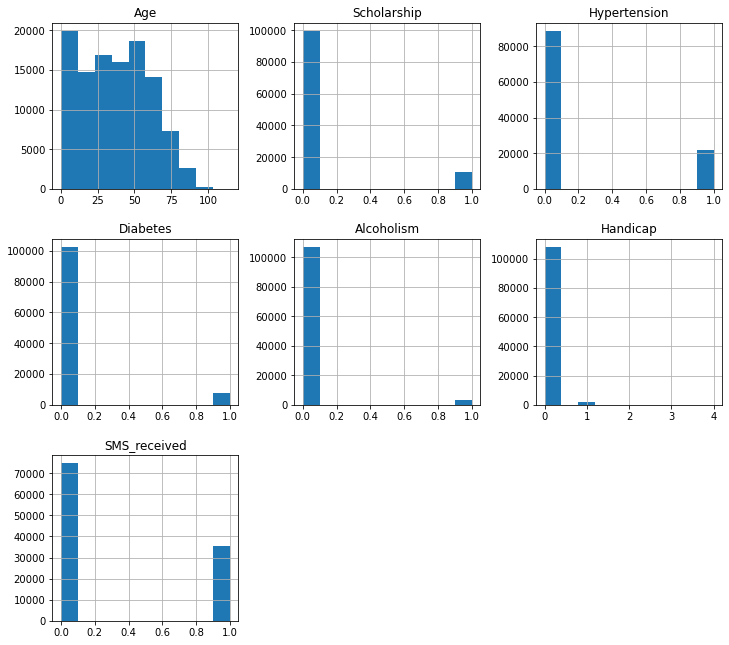

In [13]:
#show hisograme of all dataset
df.hist(figsize=(12,11));

• patients who have scholarship is less than 10% from total patients.

• patients who have Hypertension is more than 20% from total patients.

• patients who have Diabetes is less than 10% from total patients.

• the most of patient do not have Alcoholism.

• near to 30% of patients received sms .

In [14]:
# create filter for show and noShow to facilitate recall and comparison and count
#patients who show or no show in them appointment.
noshow = df.Noshow == 'Yes'
show = df.Noshow == 'No'
df[show].count(),df[noshow].count()

(Gender           88207
 Age              88207
 Neighbourhood    88207
 Scholarship      88207
 Hypertension     88207
 Diabetes         88207
 Alcoholism       88207
 Handicap         88207
 SMS_received     88207
 Noshow           88207
 dtype: int64,
 Gender           22319
 Age              22319
 Neighbourhood    22319
 Scholarship      22319
 Hypertension     22319
 Diabetes         22319
 Alcoholism       22319
 Handicap         22319
 SMS_received     22319
 Noshow           22319
 dtype: int64)

Patients who show is near to 80% from total Patients

Patients who not show is near to 20% from total Patients

### Research Question 1  (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?)

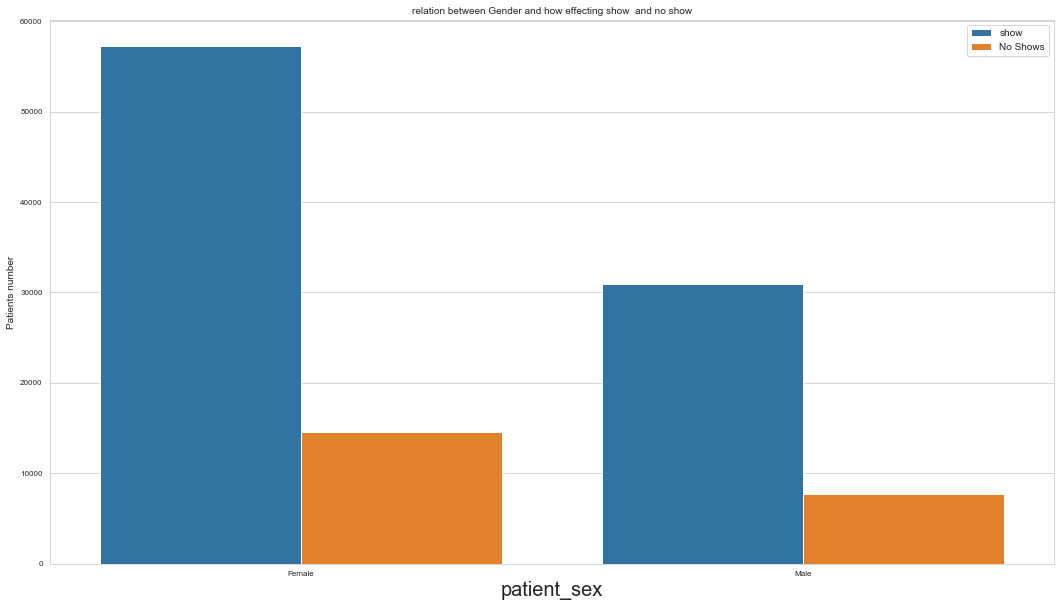

In [16]:
# The effecting of gender in patients number show or noshow
def patient_sex(i):
    if i == 'M':
        return 'Male'
    elif i == 'F':
        return 'Female'

df['patient_sex'] = df['Gender'].apply(lambda i: patient_sex(i))
sns.set_style('whitegrid')
plt.figure(figsize=(18, 10))
sns.countplot(x='patient_sex', hue = 'Noshow', data = df)
plt.title('relation between Gender and how effecting show  and no show', fontsize =10)
plt.xlabel('patient_sex', fontsize =20)
plt.ylabel('Patients number', fontsize = 10)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.legend(['show', 'No Shows'])
plt.show()


In [21]:
print(df.Gender[show].value_counts())
print(df.Gender[noshow].value_counts())

F    57245
M    30962
Name: Gender, dtype: int64
F    14594
M     7725
Name: Gender, dtype: int64


we can see Females have heigher rate in show or noshow so Gender have no clear effect in patients show or no show

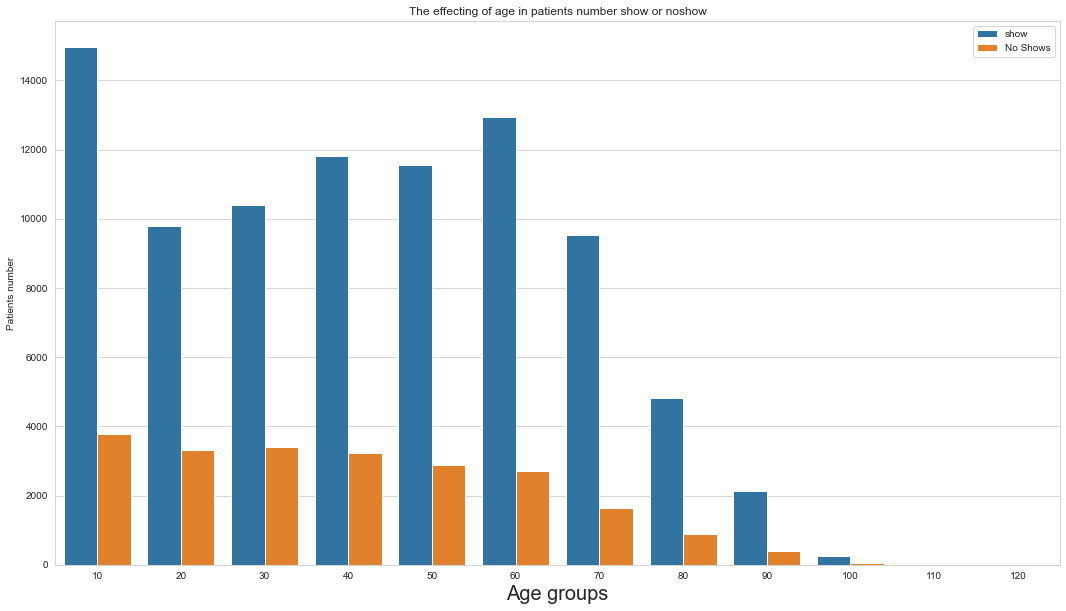

In [17]:
# The effecting of age in patients number show or noshow
#function to show age in groups 
def age_group(i):
    if i <= 10:
        return 10
    elif i <= 20:
        return 20
    elif i <= 30:
        return 30
    elif i <= 40:
        return 40
    elif i <= 50:
        return 50
    elif i <= 60:
        return 60
    elif i <= 70:
        return 70
    elif i <= 80:
        return 80
    elif i <= 90:
        return 90
    elif i <= 100:
        return 100
    elif i <= 110:
        return 110
    elif i<=120:
        return 120
df['Age_group'] = df['Age'].apply(lambda i: age_group(i))
sns.set_style('whitegrid')
plt.figure(figsize=(18, 10))
sns.countplot(x='Age_group', hue = 'Noshow', data = df)
plt.title('The effecting of age in patients number show or noshow')
plt.xlabel('Age groups', fontsize =20)
plt.ylabel('Patients number')
plt.tick_params(axis='both', which='major')
plt.legend(['show', 'No Shows'])
plt.show()

We see that rates of age from 0 to 10 are show more than any othr age group.also have the biggest noshow rate

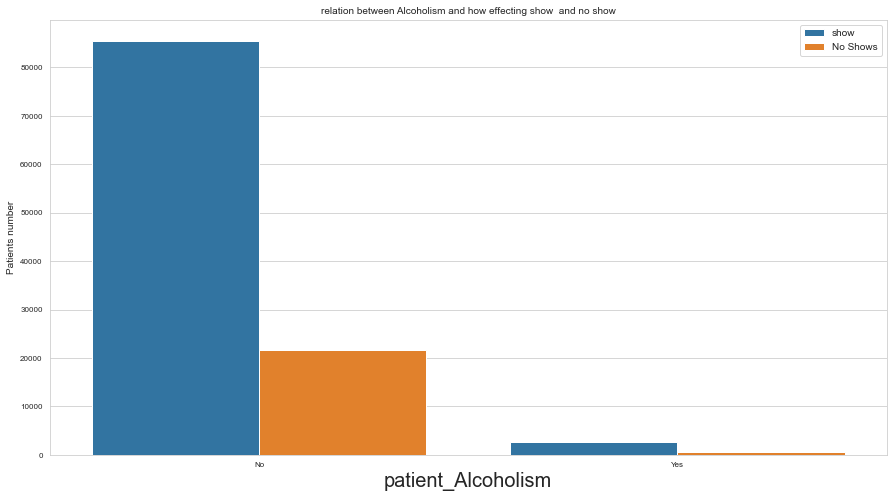

In [19]:
# The effecting of Alcoholism in patients number show or noshow
def patient_Alcoholism(i):
    if i == 0:
        return 'No'
    elif i == 1:
        return 'Yes'

df['patient_Alcoholism'] = df['Alcoholism'].apply(lambda i: patient_Alcoholism(i))
sns.set_style('whitegrid')
plt.figure(figsize=(15, 8))
sns.countplot(x='patient_Alcoholism', hue = 'Noshow', data = df)
plt.title('relation between Alcoholism and how effecting show  and no show', fontsize =10)
plt.xlabel('patient_Alcoholism', fontsize =20)
plt.ylabel('Patients number', fontsize = 10)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.legend(['show', 'No Shows'])
plt.show()

In [20]:
print(df.Alcoholism[show].value_counts())
print(df.Alcoholism[noshow].value_counts())

0    85524
1     2683
Name: Alcoholism, dtype: int64
0    21642
1      677
Name: Alcoholism, dtype: int64


There are fewer Patient with alcoholism

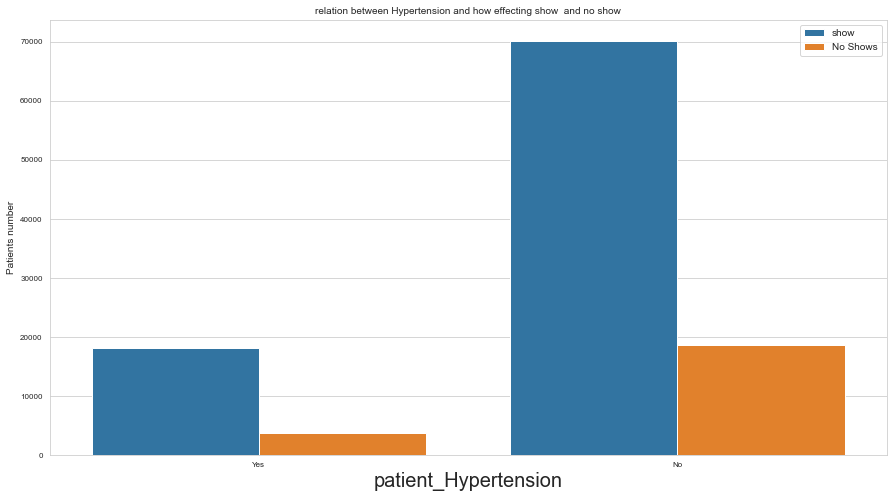

In [22]:
#relation between Hypertension and how effecting show  and no show
def patient_Hypertension(i):
    if i == 0:
        return 'No'
    elif i == 1:
        return 'Yes'

df['patient_Hypertension'] = df['Hypertension'].apply(lambda i: patient_Hypertension(i))
sns.set_style('whitegrid')
plt.figure(figsize=(15, 8))
sns.countplot(x='patient_Hypertension', hue = 'Noshow', data = df)
plt.title('relation between Hypertension and how effecting show  and no show', fontsize =10)
plt.xlabel('patient_Hypertension', fontsize =20)
plt.ylabel('Patients number', fontsize = 10)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.legend(['show', 'No Shows'])
plt.show()

In [26]:
print(df.Hypertension[show].value_counts())
print(df.Hypertension[noshow].value_counts())

0    70178
1    18029
Name: Hypertension, dtype: int64
0    18547
1     3772
Name: Hypertension, dtype: int64


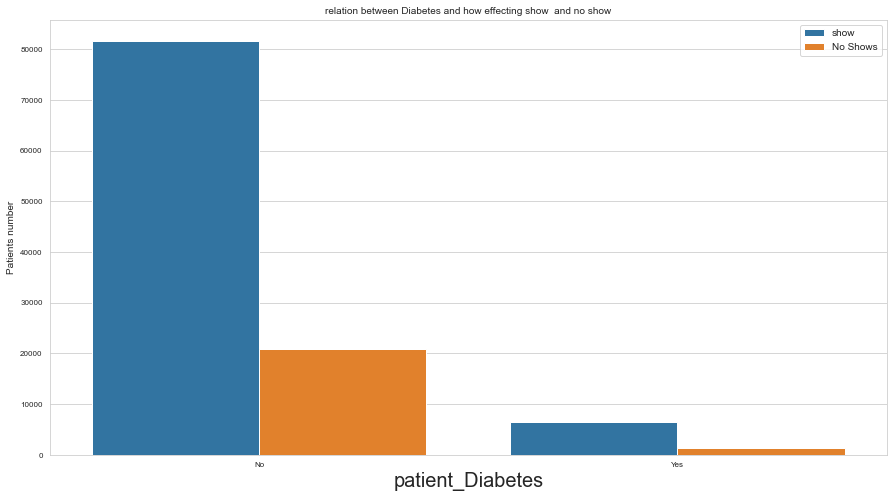

In [23]:
#relation between Diabetes and how effecting show  and no show
def patient_Diabetes(i):
    if i == 0:
        return 'No'
    elif i == 1:
        return 'Yes'

df['patient_Diabetes'] = df['Diabetes'].apply(lambda i: patient_Diabetes(i))
sns.set_style('whitegrid')
plt.figure(figsize=(15, 8))
sns.countplot(x='patient_Diabetes', hue = 'Noshow', data = df)
plt.title('relation between Diabetes and how effecting show  and no show', fontsize =10)
plt.xlabel('patient_Diabetes', fontsize =20)
plt.ylabel('Patients number', fontsize = 10)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.legend(['show', 'No Shows'])
plt.show()

In [27]:
print(df.Diabetes[show].value_counts())
print(df.Diabetes[noshow].value_counts())

0    81694
1     6513
Name: Diabetes, dtype: int64
0    20889
1     1430
Name: Diabetes, dtype: int64


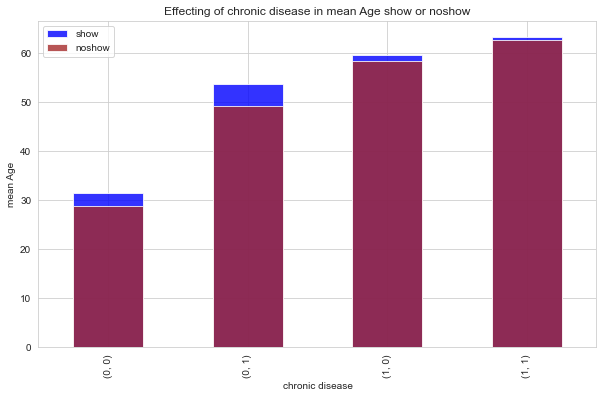

In [24]:
#relation between chronic disease and age and how effecting show  and no show
plt.figure(figsize=[10,6])
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar', alpha=0.8, color='blue', label='show')
df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar', alpha=0.8, color='brown', label='noshow')
plt.legend();
plt.title('Effecting of chronic disease in mean Age show or noshow')
plt.xlabel('chronic disease')
plt.ylabel('mean Age');

• as we see patient who do not have any disease are the most show .

• patients who have Hypertension show more than patients have Diabetes.

• patients over 60 and have chronic disease have the heighest show percentage and also noshow too.

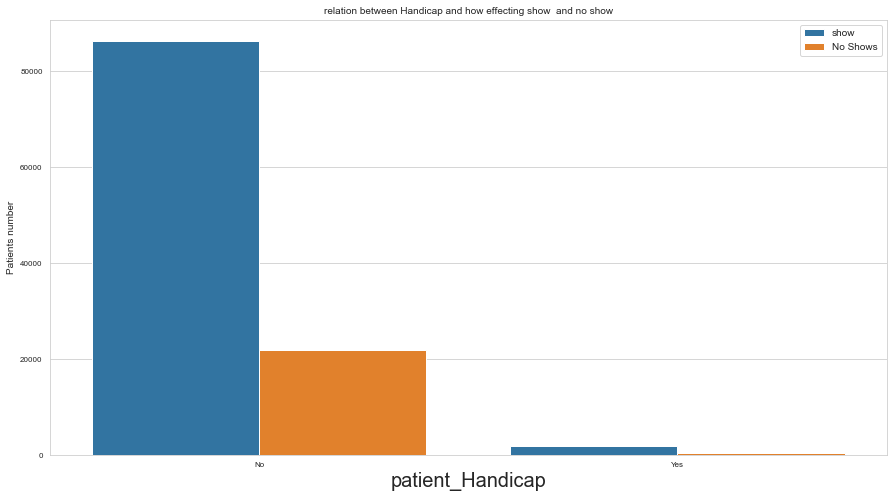

In [29]:
#relation between Handicap and how effecting show  and no show
def patient_Handicap(i):
    if i == 0:
        return 'No'
    elif i >= 1:
        return 'Yes'

df['patient_Handicap'] = df['Handicap'].apply(lambda i: patient_Handicap(i))
sns.set_style('whitegrid')
plt.figure(figsize=(15, 8))
sns.countplot(x='patient_Handicap', hue = 'Noshow', data = df)
plt.title('relation between Handicap and how effecting show  and no show', fontsize =10)
plt.xlabel('patient_Handicap', fontsize =20)
plt.ylabel('Patients number', fontsize = 10)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.legend(['show', 'No Shows'])
plt.show()

In [28]:
print(df.Handicap[show].value_counts())
print(df.Handicap[noshow].value_counts())

0    86373
1     1676
2      146
3       10
4        2
Name: Handicap, dtype: int64
0    21912
1      366
2       37
3        3
4        1
Name: Handicap, dtype: int64


the most of patients don't have any Handicap , there's no clear relation between show or noshow and Handicap

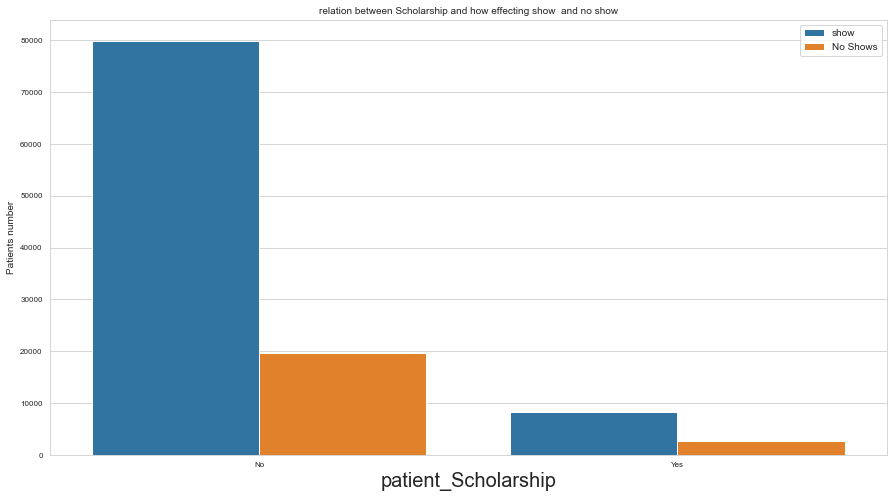

In [30]:
#relation between Scholarship and how effecting show  and no show
def patient_Scholarship(i):
    if i == 0:
        return 'No'
    elif i >= 1:
        return 'Yes'

df['patient_Scholarship'] = df['Scholarship'].apply(lambda i: patient_Scholarship(i))
sns.set_style('whitegrid')
plt.figure(figsize=(15, 8))
sns.countplot(x='patient_Scholarship', hue = 'Noshow', data = df)
plt.title('relation between Scholarship and how effecting show  and no show', fontsize =10)
plt.xlabel('patient_Scholarship', fontsize =20)
plt.ylabel('Patients number', fontsize = 10)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.legend(['show', 'No Shows'])
plt.show()

In [31]:
print(df.Scholarship[show].value_counts())
print(df.Scholarship[noshow].value_counts())

0    79924
1     8283
Name: Scholarship, dtype: int64
0    19741
1     2578
Name: Scholarship, dtype: int64


we can see patient who don't have Scholarship have the bothe heighest show and no show so there is no clear relation between Scholarship and show or noshow

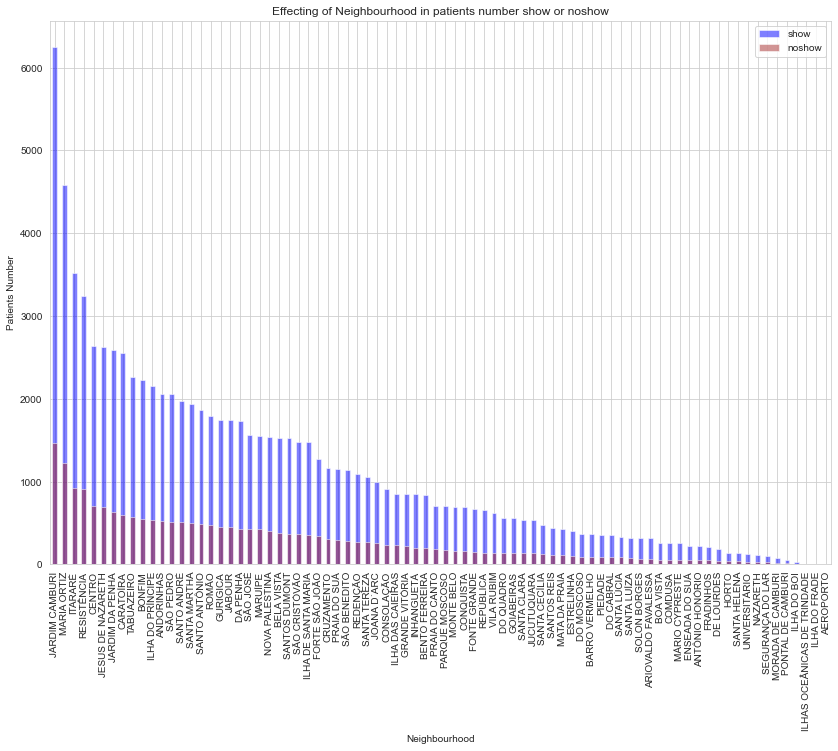

In [32]:
#relation between Neighbourhood and patients number effecting show  and no show
plt.figure(figsize=[14,10])
df[show].Neighbourhood.value_counts().plot(kind='bar', alpha=0.5, color='blue', label='show')
df[noshow].Neighbourhood.value_counts().plot(kind='bar', alpha=0.5, color='brown', label='noshow')
plt.legend()
plt.title('Effecting of Neighbourhood in patients number show or noshow')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number');

Neighbourhood has strongley effective in persons show in them appointment

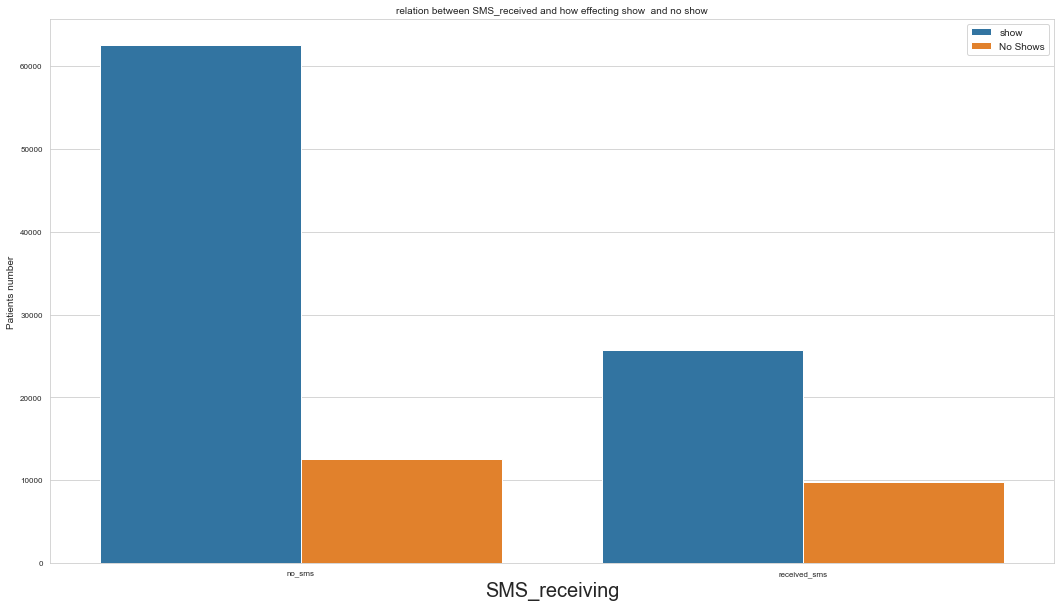

In [33]:
#relation between SMS_received and how effecting show  and no show
def SMS_receiving(i):
    if i == 0:
        return 'no_sms'
    elif i == 1:
        return 'received_sms'

df['SMS_receiving'] = df['SMS_received'].apply(lambda i: SMS_receiving(i))
sns.set_style('whitegrid')
plt.figure(figsize=(18, 10))
sns.countplot(x='SMS_receiving', hue = 'Noshow', data = df)
plt.title('relation between SMS_received and how effecting show  and no show', fontsize =10)
plt.xlabel('SMS_receiving', fontsize =20)
plt.ylabel('Patients number', fontsize = 10)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.legend(['show', 'No Shows'])
plt.show()

The rate of no shows is much higher when SMS messages were received so sending an SMS for the appiontment is not neccessary the right option to make sure that the patient will come.

<a id='conclusions'></a>
## Conclusions

• we found Age is very effective in show rate and we find Age group from 0-10 has the most shown rate .

• People who has Scholarship are having the most noshow rate and patients who don't have a scholarship have the most show rate

• the features such as different gender or alcoholic is not a factor to decide if the person would come to his appointment or not but persons who have Handicap have the most no show rate

• Neighbourhood has strongley effective in persons show in them appointment

• As we can see and that strange, sending SMS to patients are not neccessary to be sure that the patient will come

Limitations:

• it's illogical to have Age value = 0

• there is no clear relation between chronic disease and show /noshow

• there is othe features effecting persons to show or no show like if he have job or not

References:

https://classroom.udacity.com/nanodegrees/nd002-mena-nfp2/parts/4a4b0e5e-96a2-4913-89c6-3b42e00c2810

https://app.datacamp.com/learn/career-tracks/data-scientist-with-python

In [35]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'investigate-a-dataset-template.ipynb'])

1